In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import scipy.stats as stats
import scipy.optimize as opt
import scipy.special as spl
from scipy.special import beta
import scipy.integrate as intgr
import math
import pandas as pd

# MLE Problem Set

# Problem 1

Problem 1 a)

Summary Statistics
mean:  720.2779753272437 median:  172.21 maximum:  227967.25 minimum:  0.01 Standard Deviation:  3972.663756393663


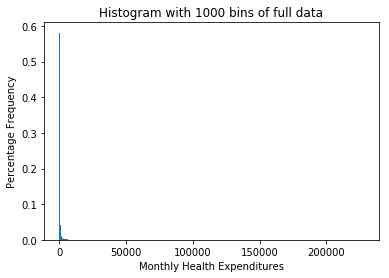

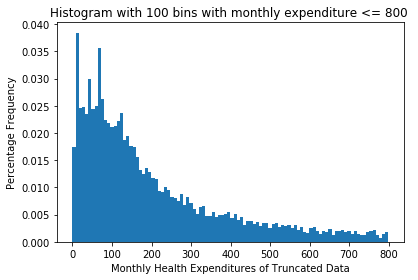

The sum of heights of bins of the truncated distribution is:  0.8494208494208465
The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.


In [36]:
data = np.loadtxt('clms.txt')
data_mean = np.mean(data)
data_median = np.median(data)
data_maximum = np.max(data)
data_minimum = np.min(data)
data_std = np.std(data)
print('Summary Statistics')
print('mean: ', data_mean, 'median: ', data_median, 'maximum: ', data_maximum, 'minimum: ', data_minimum, 'Standard Deviation: ', data_std)

weights = (1/int(len(data)))*np.ones(len(data))
n1, bin_cuts1, patches1 = plt.hist(data, 1000, weights= weights)
plt.title('Histogram with 1000 bins of full data')
plt.xlabel('Monthly Health Expenditures')
plt.ylabel('Percentage Frequency')
plt.show()

#Masking the data so that values more than 800 are masked off
data_trunc = ma.masked_greater(data,800)
weights2 = (1/int(len(data_trunc)))*np.ones(len(data_trunc))
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, weights=weights2)
plt.title('Histogram with 100 bins with monthly expenditure <= 800 ')
plt.xlabel('Monthly Health Expenditures of Truncated Data')
plt.ylabel('Percentage Frequency')
plt.tight_layout()
plt.show()
print('The sum of heights of bins of the truncated distribution is: ', n2.sum())
print('The second histogram is a much better visualisation of the distribution of data as very few observations lie outside the limit of 800.')


Problem 1 b)

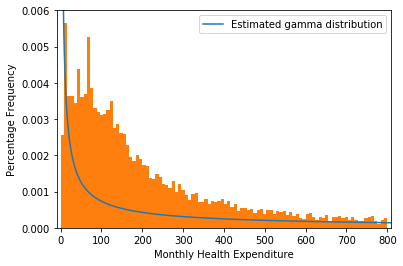

In [17]:
#MLE Estimator- Gamma Distribution

def trunc_gamma_pdf(xvals, alpha, beta):        
    pdf_vals = ((xvals)**(alpha-1))*(np.exp(-(xvals/beta)))/((beta**alpha)*math.gamma(alpha))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = trunc_gamma_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GA(data):
    mean = np.mean(data)
    var = np.var(data)
    beta_init = var / mean
    alpha_init = mean / beta_init
    params_init = np.array([alpha_init, beta_init])
    mle_args = data
    results_uncstr = opt.minimize(crit, params_init, args=(mle_args), method= "L-BFGS-B", bounds = ((1e-5,None),((1e-5,None))))
    alpha_MLE, beta_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, log_likelihood

alpha_MLE, beta_MLE, log_likelihood= GA(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gamma_pdf(x_dom, alpha_MLE, beta_MLE)
plt.plot(x_dom, pdf, label='Estimated gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()




Problem 1 c)

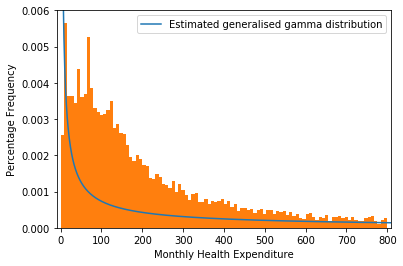

In [18]:
#Generalised Gamma Distribution

alpha_init= 0.2217553188239722
beta_init= 21911.06469927622

def trunc_gen_gamma_pdf(xvals, alpha, beta, m):        
    pdf_vals = m*((xvals)**(alpha-1))*(np.exp(-((xvals/beta)**m)))/((beta**alpha)*math.gamma(alpha/m))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_gamma_gen(xvals, alpha, beta, m):
    pdf_vals = trunc_gen_gamma_pdf(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gamma_gen(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GG(data):
    params_init = np.array([alpha_init, beta_init, 1])
    mle_args = data
    results_uncstr = opt.minimize(crit_gamma, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-10,None),(1e-10,None),(1e-10, None)))
    alpha_MLE, beta_MLE, m_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return alpha_MLE, beta_MLE, m_MLE, log_likelihood

alpha_MLE, beta_MLE, m_MLE, log_likelihood = GG(data)
x_dom= np.linspace(1,len(data), len(data))
pdf = trunc_gen_gamma_pdf(x_dom, alpha_MLE, beta_MLE, m_MLE)
plt.plot(x_dom, pdf, label='Estimated generalised gamma distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

    
    

Problem 1 d)

0.09970665447367526 4450472.61330842 60.9796264230272 166.09988119890002 74874.31496702053


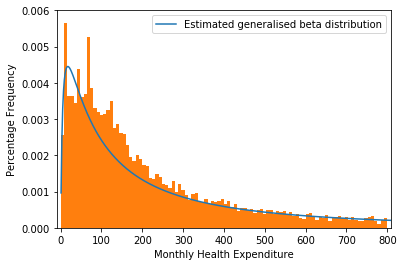

In [19]:
#2GB2 Distribution

#From previous estimation
alpha_init= 0.22173770055937686  
beta_init= 21911.064427545673 
m_init=  0.9970912437475302


#Setting initial parameters of 2GB2
q_init = 200
a_init = m_init
b_init = (q_init**(1/m_init))*beta_init
p_init = alpha_init/m_init


def gen_beta_pdf(xvals, a, b, p, q):        
    pdf_vals = a*(xvals**(a*p-1))/(b**(a*p)*beta(p,q)*(1+(xvals/b)**a)**(p+q))
    pdf_vals = np.ravel(pdf_vals)
    return pdf_vals

def log_lik_beta(xvals, a, b, p, q):
    pdf_vals = gen_beta_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_beta(params, *args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_beta(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

def GB(data):
    params_init = np.array([a_init, b_init, p_init, q_init])
    mle_args = data
    results_uncstr = opt.minimize(crit_beta, params_init, args=(mle_args),
                                  method = "L-BFGS-B", bounds = ((1e-5,None),(1e-5,None),
                                                                 (1e-5, None),(1e-5, None)))
    a_MLE, b_MLE, p_MLE, q_MLE = results_uncstr.x
    log_likelihood = results_uncstr.fun
    return a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood

a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood= GB(data)
print(a_MLE, b_MLE, p_MLE, q_MLE, log_likelihood)
x_dom= np.linspace(1,len(data), len(data))
pdf = gen_beta_pdf(x_dom, a_MLE, b_MLE, p_MLE, q_MLE)
plt.plot(x_dom, pdf, label='Estimated generalised beta distribution')
plt.legend()
data_trunc = ma.masked_greater(data,800)
n2, bin_cuts2, patches2 = plt.hist(data_trunc, 100, density=True)
plt.xlim(-10,810)
plt.ylim(0,.006)
plt.xlabel('Monthly Health Expenditure')
plt.ylabel('Percentage Frequency')
plt.show()

Problem 1 e) 

In [20]:
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)
alpha_MLE_c, beta_MLE_c, m_MLE_c, log_likelihood_c = GG(data)
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)

# Likelihood ratio test of part b) vs part d) 
log_lik_h0 = log_likelihood_d
log_lik_mle = log_likelihood_b
log_lik_mle2 = log_likelihood_c
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) = ', pval_h0)


# Likelihood ratio test of part c) vs part d) 
LR_val2 = 2 * (log_lik_mle2 - log_lik_h0)
pval_h0 = 1.0 - stats.chi2.cdf(LR_val2, 2)
print('chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) = ', pval_h0)


chi squared of H0 with 2 degrees of freedom p-value (Part b vs Part d) =  0.0
chi squared of H0 with 2 degrees of freedom p-value (Part c vs Part d) =  0.0


Problem 1 f)

In [21]:
a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d, log_likelihood_d= GB(data)
alpha_MLE_b, beta_MLE_b, log_likelihood_b= GA(data)


prob_beta = intgr.quad(gen_beta_pdf, 1000, np.inf, args=(a_MLE_d, b_MLE_d, p_MLE_d, q_MLE_d))
prob_gamma = intgr.quad(trunc_gamma_pdf, 1000, np.inf, args= (alpha_MLE_b, beta_MLE_b))

print('Probability of claim greater than $1000 under Beta distribution: ', prob_beta[0])
print('Probability of claim greater than $1000 under Gamma distribution: ', prob_gamma[0])


Probability of claim greater than $1000 under Beta distribution:  0.12848854805896373
Probability of claim greater than $1000 under Gamma distribution:  0.4519597383707461


# Problem 2

Problem 2 a)

In [38]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,w,k):
    return np.log(1/(1-alpha)* w * (k**(-alpha)))

def get_like(params, *args):
    w,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,w,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.5
mu_init = 9  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
w = np.ravel(np.array(mac_data[['w']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (w, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print('Inverse Hessian is: ',results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)



Inverse Hessian is:  [[ 4.70183413e-05  3.27433841e-04 -4.45837457e-04  1.67283314e-05]
 [ 3.27433841e-04  3.51691732e-03 -4.74292151e-03  1.17756823e-04]
 [-4.45837457e-04 -4.74292151e-03  6.42191238e-03 -1.46531980e-04]
 [ 1.67283314e-05  1.17756823e-04 -1.46531980e-04  4.25056059e-05]]
alpha_MLE: 0.5533939681361759 rho_MLE:  0.8246566377654961 mu_MLE:  8.10668349893346 sig_MLE: 0.09278026057620306
log likelihood:  95.8582756898303


Problem 2 b)

In [39]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x
log_likelihood = results_uncstr.fun
print(results_uncstr.hess_inv)
print('alpha_MLE:', alpha_MLE, 'rho_MLE: ', rho_MLE, 'mu_MLE: ', mu_MLE,'sig_MLE:', sig_MLE)
print('log likelihood: ', -log_likelihood)


[[ 6.99956986e-06 -1.95006829e-06 -6.03846036e-06  2.93898980e-06]
 [-1.95006829e-06  1.43003071e-05 -8.39280532e-06 -1.82573244e-05]
 [-6.03846036e-06 -8.39280532e-06  3.18783773e-05 -9.05410544e-06]
 [ 2.93898980e-06 -1.82573244e-05 -9.05410544e-06  4.26296998e-05]]
alpha_MLE: 0.5533884718372466 rho_MLE:  0.8246599273918177 mu_MLE:  7.569612222432442 sig_MLE: 0.09278026108109927
log likelihood:  95.85827568678722


Problem 2 c)

In [11]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 

def get_z(alpha,r,k):
    z= np.log((r*(k)**(1-alpha))/alpha)
    return z

def get_like(params, *args):
    r,k = args
    alpha,rho,mu,sigma = params
    z = get_z(alpha,r,k)
    log_like_array = np.zeros_like(z)
    log_like_array[0] =  stats.norm.pdf(mu, loc = mu,scale = sigma)
    for i in range(1,len(z)):
        log_like_array[i] = stats.norm.pdf( z[i],loc = rho*z[i-1] + (1-rho)*mu,scale = sigma)
    log_sum =  - np.sum(np.log(log_like_array))
    return log_sum

alpha_init = 0.5
rho_init = 0.8
mu_init = 8  # mu_2
sig_init = .1  # sig_2

params_init = np.array([alpha_init, rho_init, mu_init, sig_init])
r = np.ravel(np.array(mac_data[['r']]))
k = np.ravel(np.array(mac_data[['k']]))
mle_args = (r, k)
results_uncstr = opt.minimize(get_like, params_init, args=(mle_args))
alpha_MLE, rho_MLE, mu_MLE, sig_MLE = results_uncstr.x

z_star = (1-alpha_MLE)*np.log(7500000) - np.log(alpha_MLE)
mean_dist = rho_MLE*10 + (1-rho_MLE)*mu_MLE

def pdf_partc(x, mean, sigma):
    pdf = stats.norm.pdf(x, mean, sigma)
    return pdf
    
    
prob_greater = intgr.quad(pdf_partc, z_star, np.inf, args=(mean_dist, sig_MLE))
print('The probability is: ', prob_greater)

The probability is:  (0.9999999999999996, 4.680326606153411e-09)


# Problem 3

Problem 3 a)

Text(0.5,1,'Income distribution in U.S')

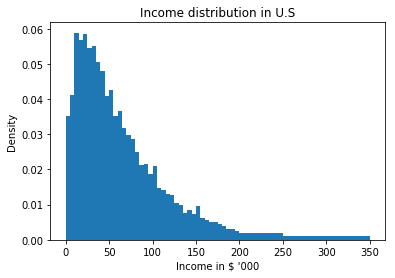

In [17]:
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
data.Midpoint = data.Midpoint/1000
weights = np.copy(data.Percent)
weights[40] = weights[40]/10
weights[41] = weights[41]/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

Problem 3 b)

3.893445611756697 0.9757364309043436


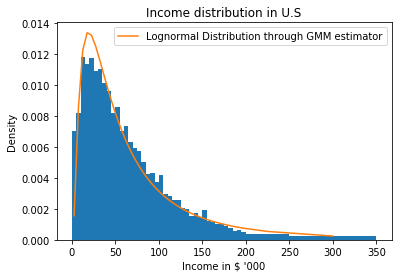

In [20]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_lognormal(x, mu, sigma):
    f = ((1/(x*sigma*np.sqrt(2*np.pi))))*np.exp((-((np.log(x) - mu)**2)/(2*sigma**2)))
    return f
    
def dist_moments(mu, sigma):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_lognormal, bins[i], bins[i+1], args=(mu,sigma))[0]
    return moments

def error_func(mu, sigma, absolute):
    if absolute==True:
        error = (dist_moments(mu, sigma) - percent)
    else:
        error = (dist_moments(mu, sigma) - percent)/percent
    return error

def crit_func(params, *args):
    mu, sigma = params
    W, absolute = args
    error = error_func(mu, sigma, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate(percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    W = np.diag(percent)
    mu_init = np.log(69677)
    sigma_init = .98
    params_init = np.array([mu_init, sigma_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args),bounds=((None, None), (1e-10, None)), tol=1e-15)
    return results
    
results1= GMM_estimate(percent)
mu_GMM, sigma_GMM = results1.x
print(mu_GMM, sigma_GMM)
crit_GMM1 = results1.fun

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_lognormal(midpoint, mu_GMM, sigma_GMM)
plt.plot(midpoint, y_dom, label="Lognormal Distribution through GMM estimator")
plt.legend()
plt.show()

Problem 3 c)

1.3670736471133413 48.061964352032426


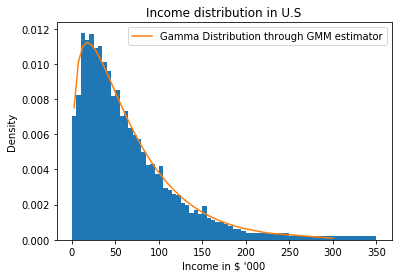

In [21]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_gamma(x, alpha, beta):
    f = ((x)**(alpha-1))*(np.exp(-(x/beta)))/((beta**alpha)*(math.gamma(alpha)))
    return f

def dist_moments(alpha, beta):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_gamma, bins[i], bins[i+1], args=(alpha, beta))[0]
    return moments

def error_func(alpha, beta, absolute):
    if absolute==True:
        error = (dist_moments(alpha, beta) - percent)
    else:
        error = (dist_moments(alpha, beta) - percent)/percent
    return error

def crit_func(params, *args):
    alpha, beta = params
    W, absolute = args
    error = error_func(alpha, beta, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate_gamma(percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    W = np.diag(percent)
    alpha_init = 4
    beta_init = 15
    params_init = np.array([alpha_init, beta_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args), method = 'L-BFGS-B', bounds=((1e-10, None), (1e-10, None)), tol=1e-15)
    return results

results = GMM_estimate_gamma(percent)
alpha_GMM, beta_GMM = results.x
print(alpha_GMM, beta_GMM)
crit_GMM_gamma = results.fun

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_gamma(midpoint, alpha_GMM, beta_GMM)
plt.plot(midpoint, y_dom, label="Gamma Distribution through GMM estimator")
plt.legend()
plt.show()


Problem 3 d)

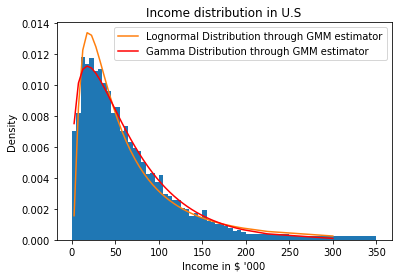

The minimized weighted errors in the Lognormal and Gamma estimations are:  0.03551648133227669 0.014084919473327111
The Lognormal GMM estimator gives a better fit


In [23]:
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom1 = pdf_lognormal(midpoint, mu_GMM, sigma_GMM)
plt.plot(midpoint, y_dom1, label="Lognormal Distribution through GMM estimator")
plt.legend()

y_dom2= pdf_gamma(midpoint, alpha_GMM, beta_GMM)
plt.plot(midpoint, y_dom2,'r', label="Gamma Distribution through GMM estimator")
plt.legend()
plt.show()

print('The minimized weighted errors in the Lognormal and Gamma estimations are: ', crit_GMM1, crit_GMM_gamma)
print('The Lognormal GMM estimator gives a better fit')

Problem 3 e)

      fun: 2.1873058608790075e-07
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.79225379, 0.35908241])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 87
      nit: 12
   status: 0
  success: True
        x: array([ 3.56229879, 12.36232719])


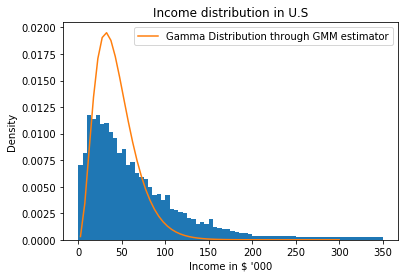

In [40]:
data = pd.read_table("usincmoms.txt", header = None)
data.columns = ["Percent", "Midpoint"]
data.Midpoint = data.Midpoint/1000
percent = np.ravel(np.array(data.Percent))
midpoint = np.ravel(np.array(data.Midpoint))

def pdf_gamma(x, alpha, beta):
    f = ((x)**(alpha-1))*(np.exp(-(x/beta)))/((beta**alpha)*math.gamma(alpha))
    return f

def dist_moments(alpha, beta):
    bins = np.append(np.linspace(0,200,41), [250,350])
    N = len(bins)
    moments = np.zeros(N-1)
    for i in range(N-1):
        moments[i] = intgr.quad(pdf_gamma, bins[i], bins[i+1], args=(alpha, beta))[0]
    return moments

def error_func(alpha, beta, absolute):
    if absolute==True:
        error = (dist_moments(alpha, beta) - percent)
    else:
        error = (dist_moments(alpha, beta) - percent)/percent
    return error

def crit_func(params, *args):
    alpha, beta = params
    W, absolute = args
    error = error_func(alpha, beta, absolute)
    crit = (error.T)@W@error
    return crit

def GMM_estimate_gamma(W, percent):
    bins = np.append(np.linspace(0,200,41), [250,350])
    alpha_init = 4
    beta_init = 15
    params_init = np.array([alpha_init, beta_init])
    gmm_args = (W, False)
    results = opt.minimize(crit_func, params_init, 
                           args=(gmm_args), method = 'L-BFGS-B', bounds=((1e-5, None), (1e-5, None)), tol=1e-15)
    return results

def W_estimator(n, N):
    W_init = np.identity(n)
    results = GMM_estimate_gamma(W_init, percent)
    alpha_1, beta_1 = results.x
    error_1 = error_func(alpha_1, beta_1, False)
    omega_1 = (1/N)*np.outer(error_1,error_1)
    W2 = np.linalg.pinv(omega_1)
    return W2

W2 = W_estimator(42, 121084000)
results_W2= GMM_estimate_gamma(W2, percent)
alpha_GMM_W2, beta_GMM_W2 = results_W2.x
crit_GMM_W2 = results_W2.fun
print(results_W2)

weights = np.copy(data.Percent)
weights[40] = (weights[40])/10
weights[41] = (weights[41])/20

bins = np.append(np.linspace(0,200,41), [250,350])
plt.hist(data.Midpoint, bins = bins, weights=weights/5)
plt.xlabel("Income in $ '000")
plt.ylabel("Density")
plt.title("Income distribution in U.S")

y_dom = pdf_gamma(midpoint, alpha_GMM_W2, beta_GMM_W2)
plt.plot(midpoint, y_dom, label="Gamma Distribution through GMM estimator")
plt.legend()
plt.show()




# Problem 4

In [26]:
data = pd.read_csv('MacroSeries.txt', header = None)


def get_z(y,k,alpha):
    z = np.log(y) - alpha*np.log(k)
    return z

def crit_brock(params, *args):
    alpha, beta, rho, mu = params
    y, k, c, w = args
    moments = np.zeros(4)
    z_t = get_z(y, k, alpha)
    z_tp1 = z_t[1:]
    z_t = z_t[:-1]
    k_tp1 = k[1:]
    c_tp1 = c[1:]
    c_t = c[:-1]
    w_t = w[:-1]
    moments[0] = np.mean(z_tp1 - rho*z_t - (1-rho)*mu)
    moments[1] = np.mean((z_tp1 - rho*z_t - (1-rho)*mu)*z_t)
    moments[2] = np.mean((beta*alpha*np.exp(z_tp1)*(k_tp1**(alpha-1))*(c_t/c_tp1))-1)
    moments[3] = np.mean(((beta*alpha*np.exp(z_tp1)*(k_tp1**(alpha-1))*(c_t/c_tp1))-1)*w_t)
    I = np.identity(4)
    error = moments.T @ I @ moments
    return error

def GMM_brock(data):
    data.columns = ['c','k','w','r','y'] 
    c_data = np.ravel(np.array(data[['c']]))
    k_data = np.ravel(np.array(data[['k']]))
    w_data = np.ravel(np.array(data[['w']]))
    r_data = np.ravel(np.array(data[['r']]))
    y_data = np.ravel(np.array(data[['y']]))
    alpha_init = 0.5
    beta_init = 0.99
    rho_init = 0.8
    mu_init =0.3
    params_init = np.array([alpha_init, beta_init, rho_init, mu_init])
    gmm_args = y_data, k_data, c_data, w_data
    brock_results = opt.minimize(crit_brock, params_init, 
                                 args = (gmm_args), method= 'L-BFGS-B', bounds=((1e-3,0.99),
                                                                                (1e-1, None),(1e-3, None), (1e-3, None) ))
    return brock_results

results = GMM_brock(data)
alpha_GMM, beta_GMM, rho_GMM, mu_GMM = results.x
error = results.fun
print('alpha: ',alpha_GMM, 'beta: ', beta_GMM, 'rho: ', rho_GMM, 'mu: ', mu_GMM)
print('objective function: ', error)
results


alpha:  0.4561398217703544 beta:  0.9115625951282226 rho:  0.9931841507248386 mu:  0.30424835158529784
objective function:  0.29140172713660933


      fun: 0.29140172713660933
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.81683614e+06,  8.82278414e+05, -9.26736426e+01, -6.94878044e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 540
      nit: 20
   status: 0
  success: True
        x: array([0.45613982, 0.9115626 , 0.99318415, 0.30424835])

# Problem 5 

Error- The code below is working but resulting in a criterion function that is not converging to zero over time. Had to interrupt the kernel.

In [55]:
mac_data = pd.read_csv('MacroSeries.txt', header = None)
mac_data.columns = ['c','k','w','r','y'] 
c_data = np.ravel(np.array(mac_data[['c']]))
k_data = np.ravel(np.array(mac_data[['k']]))
w_data = np.ravel(np.array(mac_data[['w']]))
r_data = np.ravel(np.array(mac_data[['r']]))
y_data = np.ravel(np.array(mac_data[['y']]))

def simulation(S, T, sigma, rho, mu):
    epsilon_matrix= np.zeros((T,S))
    #Generating epsilon from normal dist
    for i in range(S):
        u = np.random.uniform(size=T)
        epsilon_matrix[:,i] = stats.norm.ppf(u, loc=0, scale=sigma)
#     print(epsilon_matrix)
    return epsilon_matrix

def generate_z(S, T, sigma, rho, mu):
    #Generating time series of Z_t given epsilon
    epsilon_matrix = simulation(S, T, sigma, rho, mu)
    z_matrix=np.zeros((T,S))
    z0= mu
    for j in range(S):
        for i in range(T):
            z_matrix[i,j] = rho*z0 + (1-rho)*mu + epsilon_matrix[i,j]
            z0 = z_matrix[i,j]
#     print(z_matrix)
    return z_matrix
    
def generate_k(S, T, sigma, rho, mu, alpha, beta):
    z_matrix = generate_z(S, T, sigma, rho, mu)
    k_matrix=np.zeros((T+1,S))
    k0 = np.mean(k_data)
    k_matrix[0,:] = k0
    for i in range(1,T+1):
        k_matrix[i,:] = alpha*beta*np.exp(z_matrix[i-1,:])*(k_matrix[i-1,:])**alpha
    ktp1_matrix = k_matrix[1:, :]
    kt_matrix = k_matrix[:-1, :]
#     print(kt_matrix)
    return kt_matrix, ktp1_matrix
    
def generate_w(S, T, sigma, rho, mu, alpha, beta):
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    z_matrix = generate_z(S, T, sigma, rho, mu)
    w_matrix = (1-alpha)*np.exp(z_matrix)*(k_matrix)**alpha
    return w_matrix

def generate_r(S, T, sigma, rho, mu, alpha, beta):
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    z_matrix = generate_z(S, T, sigma, rho, mu)
    r_matrix = alpha*np.exp(z_matrix)*(k_matrix)**(alpha-1)
    return r_matrix

def generate_c(S, T, sigma, rho, mu, alpha, beta):
    kt_matrix, ktp1_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)
    w_matrix = generate_w(S, T, sigma, rho, mu, alpha, beta)
    r_matrix = generate_r(S, T, sigma, rho, mu, alpha, beta)
    c_matrix = w_matrix + r_matrix*kt_matrix - ktp1_matrix
    return c_matrix

def generate_y(S, T, sigma, rho, mu, alpha, beta):
    z_matrix= generate_z(S, T, sigma, rho, mu)
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    y_matrix = np.exp(z_matrix)*(k_matrix)**alpha
    return y_matrix

def moments_average(S, T, sigma, rho, mu, alpha, beta):
    c_matrix = generate_c(S, T, sigma, rho, mu, alpha, beta)
    y_matrix = generate_y(S, T, sigma, rho, mu, alpha, beta)
    k_matrix = generate_k(S, T, sigma, rho, mu, alpha, beta)[0]
    mom_1 = np.mean(np.mean(c_matrix, axis=0))
    mom_2 = np.mean(np.mean(k_matrix, axis=0))
    mom_3 = np.mean(np.mean(c_matrix/y_matrix, axis=0))
    mom_4 = np.mean(np.var(y_matrix, axis=0))
    correlate_c = np.zeros(S)
    correlate_k = np.zeros(S)
    c_tminus = c_matrix[1:, :]
    c_t = c_matrix[:-1, :]
    for i in range(S):
        correlate_c[i] = np.float(np.correlate(c_t[:,i], c_tminus[:,i]))
    mom_5 = np.mean(correlate_c)
    for i in range(S):
        correlate_k[i] = np.float(np.correlate(c_matrix[:,i], k_matrix[:,i]))
    mom_6 = np.mean(correlate_k)
    return mom_1, mom_2, mom_3, mom_4, mom_5, mom_6

def data_moments(c, k, y):
    data_mom1 = np.mean(c)
    data_mom2 = np.mean(k)
    data_mom3 = np.mean(c/y)
    data_mom4 = np.var(y)
    data_mom5 = np.correlate(c[:-1], c[1:])
    data_mom6 = np.correlate(c,k)
    return data_mom1, data_mom2, data_mom3, data_mom4, data_mom5, data_mom6

def error_func(S, T, sigma, rho, mu, alpha, beta, absolute):
    mom_1, mom_2, mom_3, mom_4, mom_5, mom_6 = moments_average(S, T, sigma, rho, mu, alpha, beta)
    model_moments = np.array([mom_1, mom_2, mom_3, mom_4, mom_5, mom_6])
#     print(model_moments)
    data_m1, data_m2, data_m3, data_m4, data_m5, data_m6 = data_moments(c_data, k_data, y_data)
    data_moms= np.array([data_m1, data_m2, data_m3, data_m4, data_m5, data_m6])
    if absolute==True:
        error = model_moments - data_moms
    if absolute == False:
        error = (model_moments - data_moms)/data_moms
    return error

def crit_SMM(params, *args):
    alpha, rho, mu, sigma = params
    S, T, beta, absolute = args
    W = np.identity(6)
    error = error_func(S, T, sigma, rho, mu, alpha, beta, absolute)
    criter = error.T@W@error
    print('The criterion function is: ', criter)
    return criter

alpha_init = 0.4
rho_init = 0.3
mu_init = 7
sigma_init = 0.086
params_init = np.array([alpha_init, rho_init, mu_init, sigma_init])
args_guess = 1000,100, 0.99, False
results_SMM = opt.minimize(crit_SMM, params_init, args=(args_guess), method= 'L-BFGS-B', 
                           bounds = ((0.01,0.99), (-0.99,0.99), (5,14), (0.01,1.1)))

print(results_SMM)

    
    
    
        
        
        
    

The criterion function is:  4.964190149474979
The criterion function is:  4.964237723058395
The criterion function is:  4.964325300638764
The criterion function is:  4.964162645139361
The criterion function is:  4.96426410191545
The criterion function is:  5.168348669364971
The criterion function is:  5.169096589523884
The criterion function is:  5.169107610209803
The criterion function is:  5.168397691835355
The criterion function is:  5.168694432690894
The criterion function is:  4.968085452292222
The criterion function is:  4.968132675757837
The criterion function is:  4.967936909636016
The criterion function is:  4.9681432178272615
The criterion function is:  4.9682139047449985
The criterion function is:  4.964920276869808
The criterion function is:  4.965070120574714
The criterion function is:  4.965199327333456
The criterion function is:  4.9649130554806
The criterion function is:  4.9653332647704955
The criterion function is:  4.964054517863602
The criterion function is:  4.9641

KeyboardInterrupt: 